Purpose: To get comfortable with the coding and output interpretation for one-factor ANOVA and a posteriori means comparison (Tukey) and the non-parametric Kruskal Wallis.  Additionally, you will practice making graphs and use this as an opportunity to review some concepts as well.

In [82]:
# import libraries:

library(car) # for ANOVA
library(agricolae) # for Tukey and SNK tests
library(PMCMR) # for Kruskal Wallis evaluation


# Part 1: Categorical ANOVA and means comparisons

## A.

You are interested in the amount of carbon stored in 4 different types of soils. Here are your data:

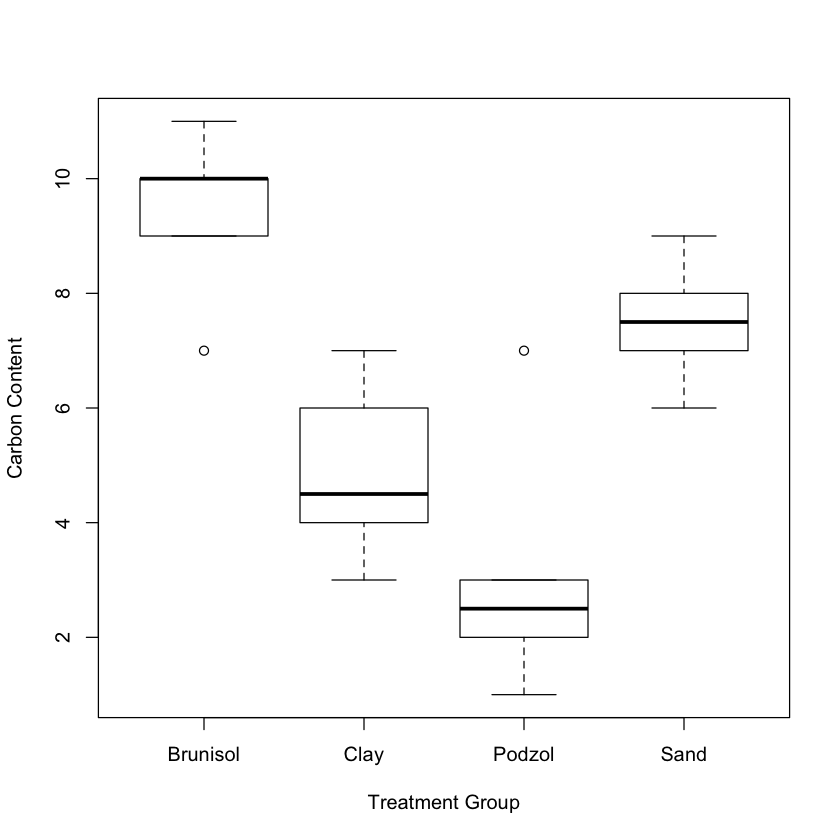

In [24]:
# import and plot data

Soil <- read.csv('soil_data.csv')
plot(Soil$Type, Soil$Carbon, xlab='Treatment Group', ylab='Carbon Content')


**What are your independent and dependent variables?**  

* Independent Variable: Soil Type
* Dependent Variable: Carbon Storage

### A.1) Test the null hypothesis

* Null Hypothesis: Carbon storage capacity is the same for all soil types.
* Alternative Hypothesis: Carbon storage capacity is different for at least one soil type.

### A.2) Check test assumptions

In [16]:
# normality using shapiro-wilk

tapply(Soil$Carbon, Soil$Type, FUN=shapiro.test)


$Brunisol

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.85656, p-value = 0.1777


$Clay

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.95801, p-value = 0.8043


$Podzol

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.81208, p-value = 0.07527


$Sand

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.96004, p-value = 0.8201



In [17]:
# homoscedasticity using bartlett

bartlett.test(Carbon~Type, data=Soil)



	Bartlett test of homogeneity of variances

data:  Carbon by Type
Bartlett's K-squared = 2.2892, df = 3, p-value = 0.5146


### A.3) Assess your null and discuss the results of the test in a biologically meaningful way

In [26]:
# fit a linear model

soil_aov <- lm(formula=Carbon~Type, data=Soil)


In [27]:
# assess null with summary.aov

summary.aov(soil_aov)


            Df Sum Sq Mean Sq F value   Pr(>F)    
Type         3 148.13   49.38   20.64 2.45e-06 ***
Residuals   20  47.83    2.39                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Null Assessment**  

The ANOVA test rejects the null that carbon storage capacity is the same for all soil types.  This suggests that at least one type is different.  Now use *a posteriori* mean comparisons to determine which soil type(s) are different.

In [28]:
# Tukey test

soil_tukey <- HSD.test(soil_aov, 'Type', group=TRUE, main='title')
soil_tukey


$statistics
   MSerror Df     Mean       CV      MSD
  2.391667 20 6.208333 24.91009 2.499095

$parameters
   test name.t ntr StudentizedRange alpha
  Tukey   Type   4         3.958293  0.05

$means
           Carbon      std r Min Max  Q25  Q50   Q75
Brunisol 9.500000 1.378405 6   7  11 9.25 10.0 10.00
Clay     4.833333 1.471960 6   3   7 4.00  4.5  5.75
Podzol   3.000000 2.097618 6   1   7 2.00  2.5  3.00
Sand     7.500000 1.048809 6   6   9 7.00  7.5  8.00

$comparison
NULL

$groups
           Carbon groups
Brunisol 9.500000      a
Sand     7.500000      a
Clay     4.833333      b
Podzol   3.000000      b

attr(,"class")
[1] "group"

In [30]:
# SNK test

soil_snk <- SNK.test(soil_aov, 'Type', group=TRUE, main='title')
soil_snk


$statistics
   MSerror Df     Mean       CV
  2.391667 20 6.208333 24.91009

$parameters
  test name.t ntr alpha
   SNK   Type   4  0.05

$snk
     Table CriticalRange
2 2.949998      1.862500
3 3.577935      2.258952
4 3.958293      2.499095

$means
           Carbon      std r Min Max  Q25  Q50   Q75
Brunisol 9.500000 1.378405 6   7  11 9.25 10.0 10.00
Clay     4.833333 1.471960 6   3   7 4.00  4.5  5.75
Podzol   3.000000 2.097618 6   1   7 2.00  2.5  3.00
Sand     7.500000 1.048809 6   6   9 7.00  7.5  8.00

$comparison
NULL

$groups
           Carbon groups
Brunisol 9.500000      a
Sand     7.500000      b
Clay     4.833333      c
Podzol   3.000000      c

attr(,"class")
[1] "group"

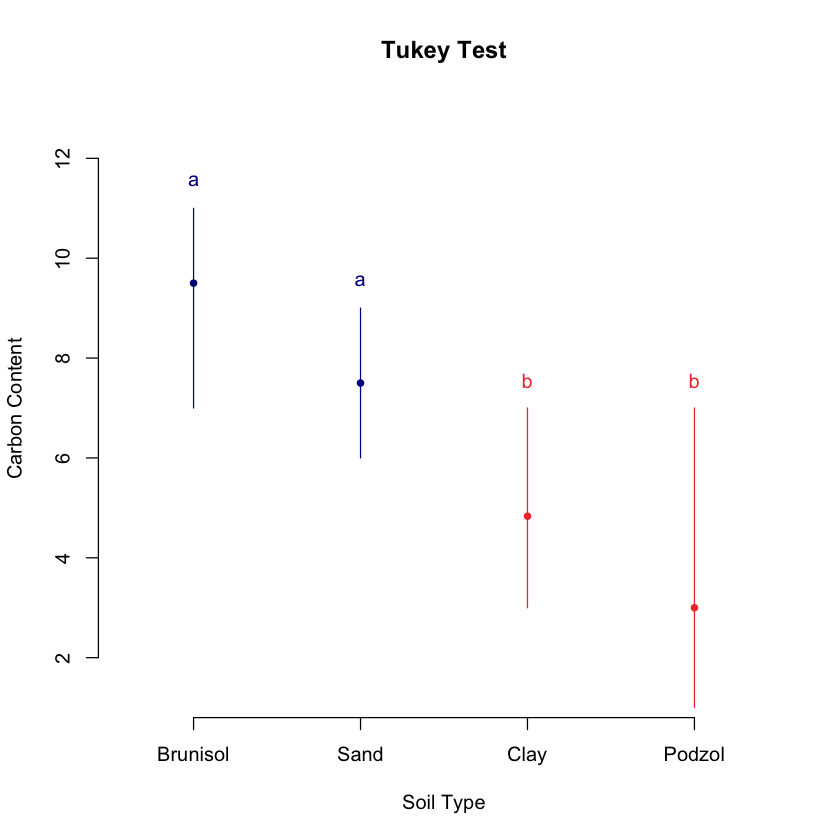

In [46]:
# plot tukey test results

plot(soil_tukey, xlab='Soil Type', ylab='Carbon Content',main='Tukey Test')


Caption: The Tukey test identifies two groups: one with Brunisol and Sand soil types (which contain more carbon) and one with Clay and Podzol soil types (containing less carbon).

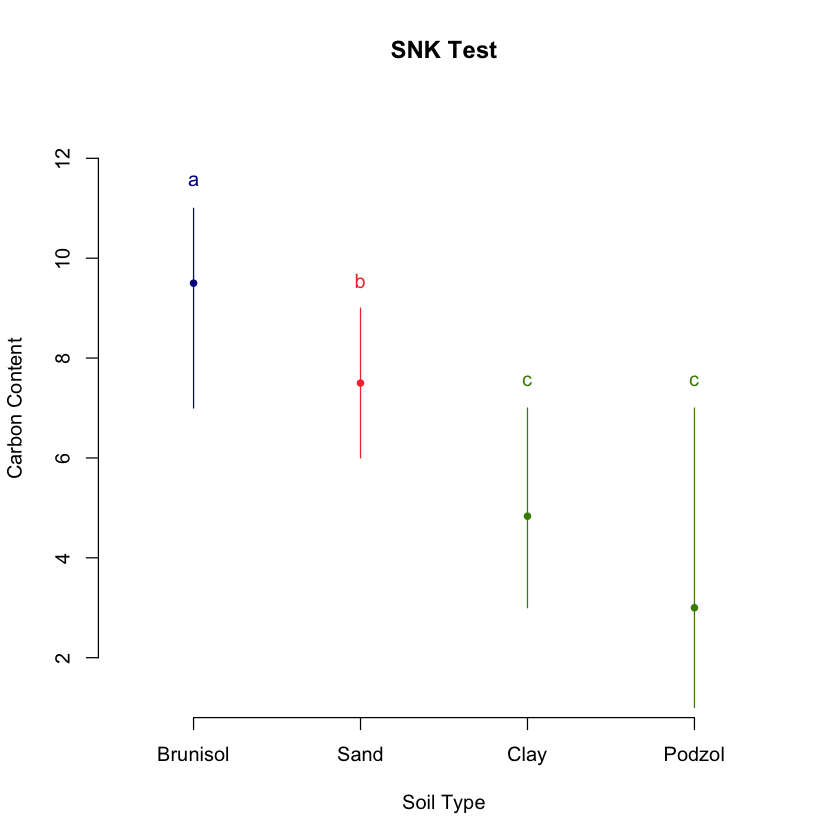

In [45]:
# plot tukey test results

plot(soil_snk, xlab='Soil Type', ylab='Carbon Content',main='SNK Test')


Caption: The SNK test identifies three groups.  The difference between this test and the Tukey test is that Brunisol and Sand are now identified as being in different groups.

## B. Need a non-parametric assessment of categorical data?

After spending 20 years in the jungle trapping tapirs, you have finished your thesis research and are back at BSU to analyze the data. You have fascinating data on the hemacrit of tapirs in different environments but you have lost 20 years of your life...

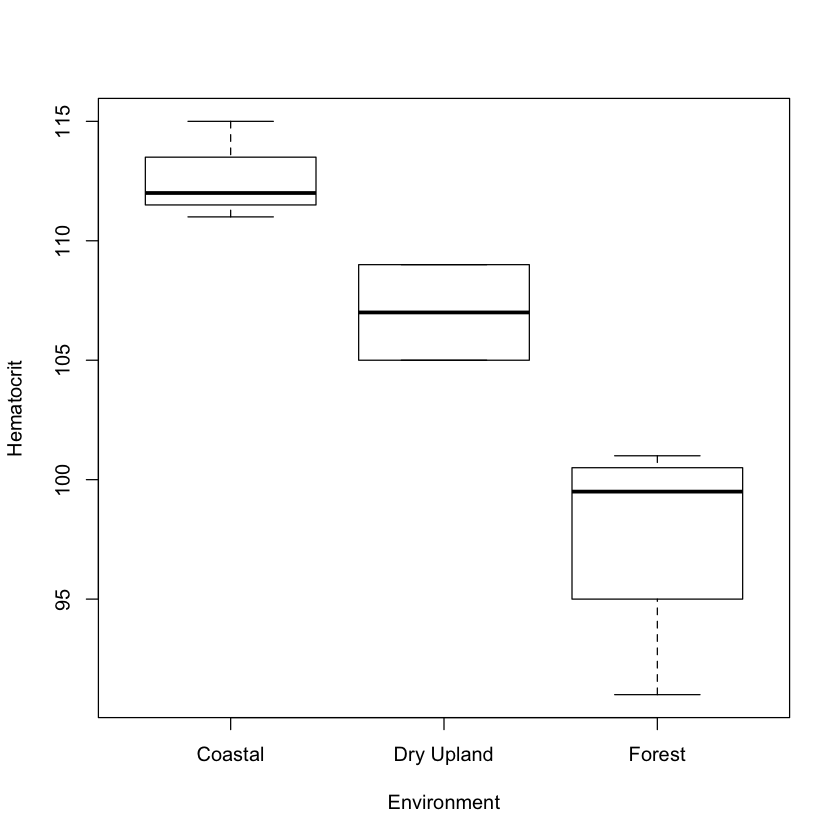

In [49]:
# import and plot data

Tapirs <- read.csv('tapir_data.csv')
plot(Tapirs$Environment, Tapirs$Hematocrit, xlab='Environment', ylab='Hematocrit')


* Research Hypothesis: Environment affects tapir hematocrit.  
* Null Hypothesis: Tapir hematocrit is the same in each environment.  
* Alternative Hypothesis: Tapir hematocrit is different in at least one environment.

In [55]:
# Kruskal Wallis test

kruskal.test(Hematocrit~Environment, data=Tapirs)



	Kruskal-Wallis rank sum test

data:  Hematocrit by Environment
Kruskal-Wallis chi-squared = 7, df = 2, p-value = 0.0302


In [59]:
# posthoc kruskal nemenyi non-parametric group comparison

posthoc.kruskal.nemenyi.test(Hematocrit~Environment, data=Tapirs, dist='Tukey')



	Pairwise comparisons using Tukey and Kramer (Nemenyi) test	
                   with Tukey-Dist approximation for independent samples 

data:  Hematocrit by Environment 

           Coastal Dry Upland
Dry Upland 0.577   -         
Forest     0.023   0.415     

P value adjustment method: none 

**Evaluate Research Hypothesis:**

The null hypothesis that tapir hematocrit is the same in each environment is rejected given the results of the Kruskal Wallis test (p-value < 0.05). The post hoc analysis showed that 'forest' and 'coastal' environments had a significant difference (p-value < 0.05) but none of the other comparisons were significantly different.  Regarding the research hypothesis, these results suggest that environment indeed affects tapir hematocrit.

## C. Fill in the ANOVA Table

In [71]:
# known values:

model_ss = 27.87
model_ms = 9.29
total_df = 39
total_ss = 129.375


In [80]:
# calculate unknown values:

model_df = model_ss/model_ms
error_df = total_df - model_df
error_ss = total_ss - model_ss
error_mse = error_ss/error_df
Fvalue = model_ms/error_mse
Pvalue = '0.05 > p > 0.1'


In [81]:
# build table

Source = c('Model', 'Error', 'Total')
df = c(model_df, error_df, total_df)
SS = c(model_ss, error_ss, total_ss)
MeanSquare = c(model_ms, error_mse, NaN)
F = c(Fvalue, NaN, NaN)
P = c(Pvalue, NaN, NaN)
filledANOVA = data.frame(Source, df, SS, MeanSquare, F, P)
filledANOVA


Source,df,SS,MeanSquare,F,P
Model,3,27.870,9.290000,3.294813,0.05 > p > 0.1
Error,36,101.505,2.819583,NaN,NaN
Total,39,129.375,NaN,NaN,NaN


**What happens to the F-value if you *increase* Error SS (but keep sample size the same)? What does it mean?**  

Increasing the Error SS while keeping the sample size constant will decrease the F-value (since this change is reflected in the denominator of the calculation).  When Error SS increases, the predicted values are farther from the measured values (the model is worse at making predictions). A smaller F-value means that you are more likely to make a type I error.

**What happens to the F-value if you *decrease* Model SS (but keep sample size the same)? What does it mean?**  

The F-value also decreases if you decrease Model SS while keeping the sample size constant (since this change is reflected in the numerator of the calculation). When Model SS decreases, the amount of variation explained by the model is lower (the treatment didn't have as much of an effect). A smaller F-value means that you are more likely to make a type I error.

# Part 2: Review

*Reviewed*